# Group 9 Project Proposal: Developing a Classification Model for Pulsar Stars

# Introduction


# Preliminary Exploratory Data Analysis

In [5]:
#loading packages
library(tidyverse)
library(tidymodels)
library(ggplot2)
library(GGally)

In [6]:
#reading data in from the web and making sure it is tidy

star_data <- read_csv("https://raw.githubusercontent.com/natashawong03/dsci100_group_project/main/HTRU_2.csv", col_names = FALSE)

star_data <- rename(star_data,
IP_mean = X1,
IP_std = X2,
IP_exk = X3,
IP_skw = X4,
DM_mean = X5,
DM_std = X6,
DM_exk = X7,
DM_skw = X8,
Class = X9) 

head(star_data, n=9)

Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): X1, X2, X3, X4, X5, X6, X7, X8, X9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


IP_mean,IP_std,IP_exk,IP_skw,DM_mean,DM_std,DM_exk,DM_skw,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
140.56250,55.68378,-0.23457141,-0.6996484,3.1998328,19.110426,7.975532,74.24222,0
102.50781,58.88243,0.46531815,-0.5150879,1.6772575,14.860146,10.576487,127.39358,0
103.01562,39.34165,0.32332837,1.0511644,3.1212375,21.744669,7.735822,63.17191,0
136.75000,57.17845,-0.06841464,-0.6362384,3.6429766,20.959280,6.896499,53.59366,0
88.72656,40.67223,0.60086608,1.1234917,1.1789298,11.468720,14.269573,252.56731,0
93.57031,46.69811,0.53190485,0.4167211,1.6362876,14.545074,10.621748,131.39400,0
119.48438,48.76506,0.03146022,-0.1121676,0.9991639,9.279612,19.206230,479.75657,0
130.38281,39.84406,-0.15832276,0.3895404,1.2207358,14.378941,13.539456,198.23646,0
107.25000,52.62708,0.45268802,0.1703474,2.3319398,14.486853,9.001004,107.97251,0


In [7]:
#now we are going to change the class variable to a factor and subset our data into training and testing dataframes
star_data <- star_data |>
  mutate(Class = as_factor(Class))

star_split <- initial_split(star_data, prop = 0.75, strata = Class)
star_train <- training(star_split)
star_test <- testing(star_split)

In [8]:
#prelim data analysis
summary(star_train)

    IP_mean            IP_std          IP_exk             IP_skw       
 Min.   :  5.812   Min.   :24.77   Min.   :-1.87601   Min.   :-1.7919  
 1st Qu.:101.141   1st Qu.:42.35   1st Qu.: 0.02582   1st Qu.:-0.1893  
 Median :115.133   Median :46.96   Median : 0.22324   Median : 0.1990  
 Mean   :111.332   Mean   :46.59   Mean   : 0.46418   Mean   : 1.7015  
 3rd Qu.:127.031   3rd Qu.:51.04   3rd Qu.: 0.46902   3rd Qu.: 0.9187  
 Max.   :192.617   Max.   :98.78   Max.   : 7.87963   Max.   :65.3860  
    DM_mean             DM_std           DM_exk           DM_skw        
 Min.   :  0.2132   Min.   :  7.37   Min.   :-3.139   Min.   :  -1.977  
 1st Qu.:  1.9231   1st Qu.: 14.45   1st Qu.: 5.819   1st Qu.:  35.525  
 Median :  2.7960   Median : 18.46   Median : 8.447   Median :  83.291  
 Mean   : 12.4242   Mean   : 26.22   Mean   : 8.332   Mean   : 105.461  
 3rd Qu.:  5.4039   3rd Qu.: 28.30   3rd Qu.:10.683   3rd Qu.: 138.660  
 Max.   :223.3921   Max.   :110.64   Max.   :34.540   Max.

In [9]:
#table of the mean values for each class 
table_1_means <- star_train |> 
group_by(Class) |>
summarize(mean_IP_mean = mean(IP_mean), mean_IP_std = mean(IP_std), mean_IP_exk = mean(IP_exk), 
          mean_IP_skw_mean = mean(IP_skw), mean_DM_mean = mean(DM_mean), mean_DM_std = mean(DM_std), mean_DM_exk = mean(DM_exk), 
          mean_DM_skw = mean(DM_skw))
table_1_means

Class,mean_IP_mean,mean_IP_std,mean_IP_exk,mean_IP_skw_mean,mean_DM_mean,mean_DM_std,mean_DM_exk,mean_DM_skw
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,116.54097,47.32704,0.2104083,0.385498,8.840375,23.31807,8.865509,113.82455
1,57.49217,38.92671,3.0873860,15.304805,49.469751,56.20198,2.821877,19.00436


In [10]:
#table of the observation count for each class
table_2_counts <- star_train |> 
    group_by(Class) |>
    summarize(count = n())
table_2_counts

Class,count
<fct>,<int>
0,12239
1,1184


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



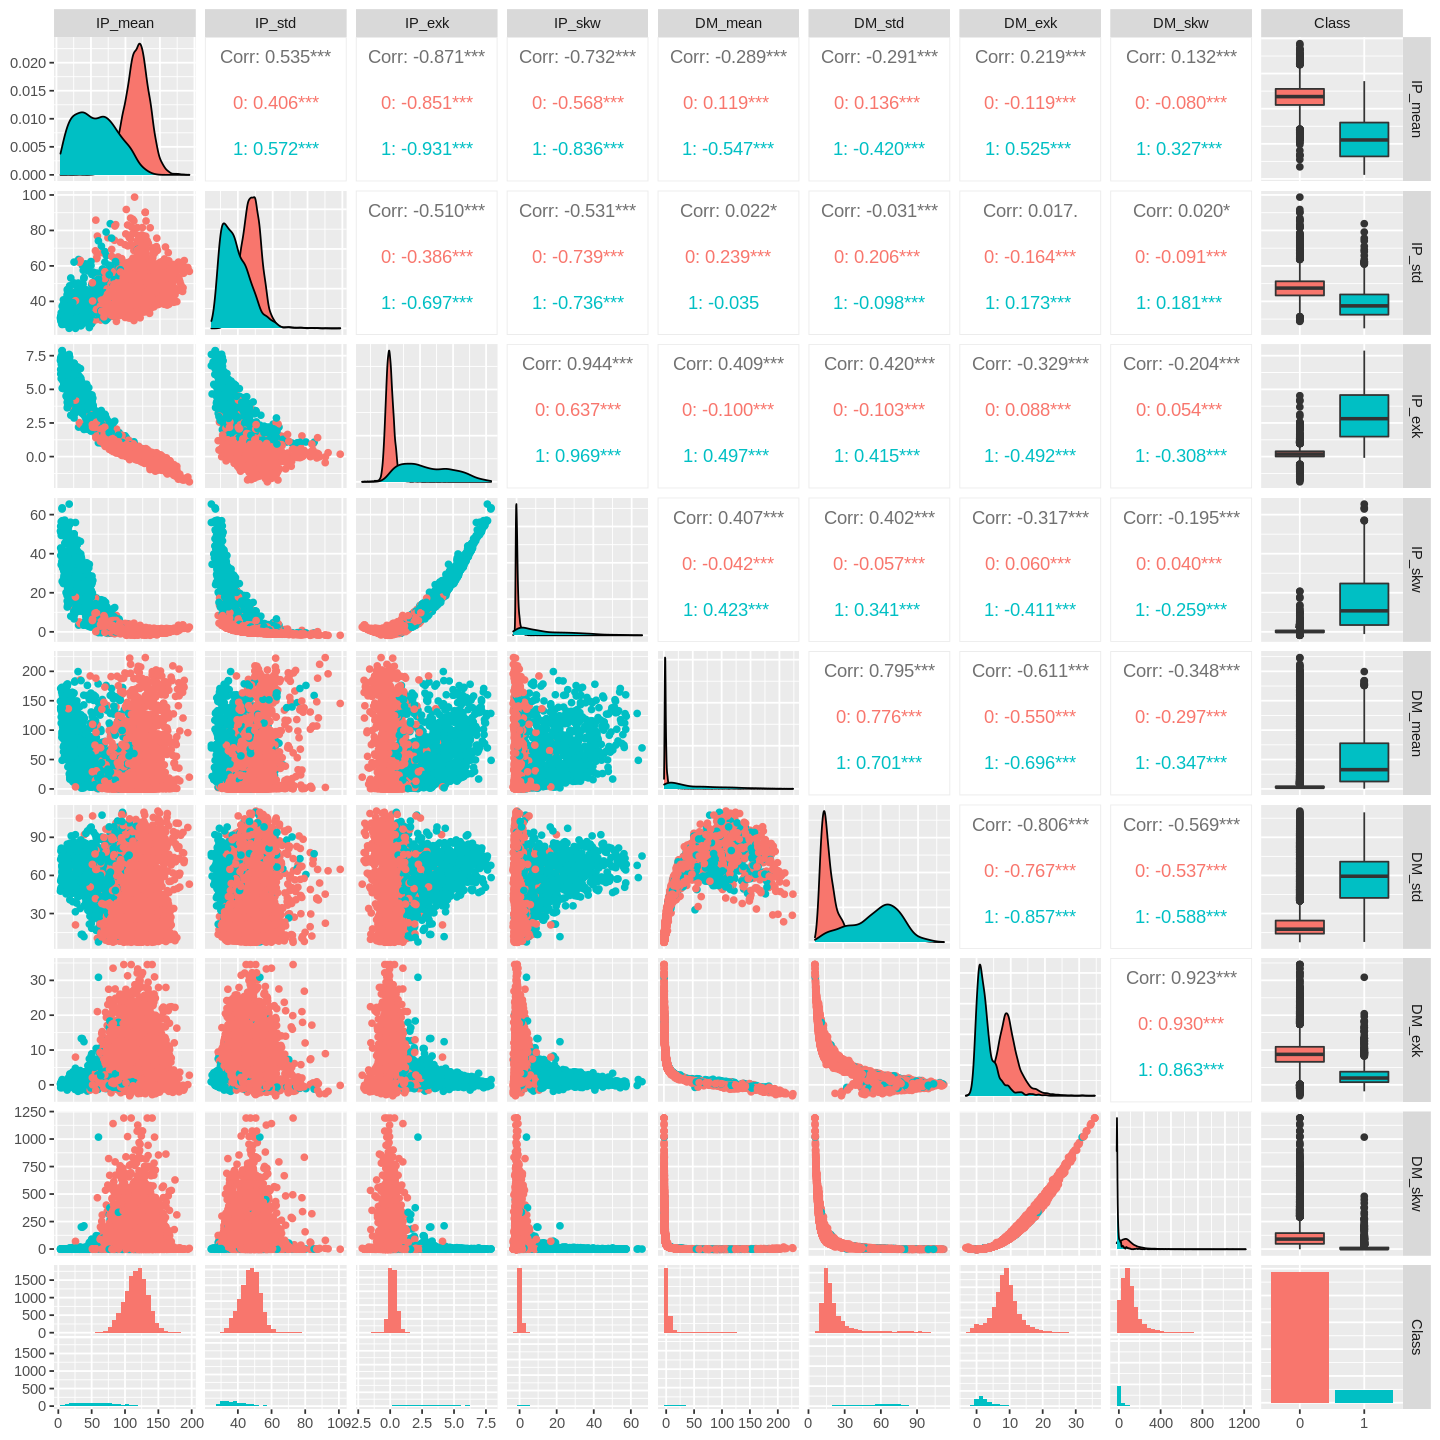

In [11]:
#next lets make a plot to show the relationships between the variables 
options(repr.plot.width = 12, repr.plot.height = 12)
var_pairs_plot <- ggpairs(star_train, aes(colour = as.factor(star_train$Class)))
var_pairs_plot

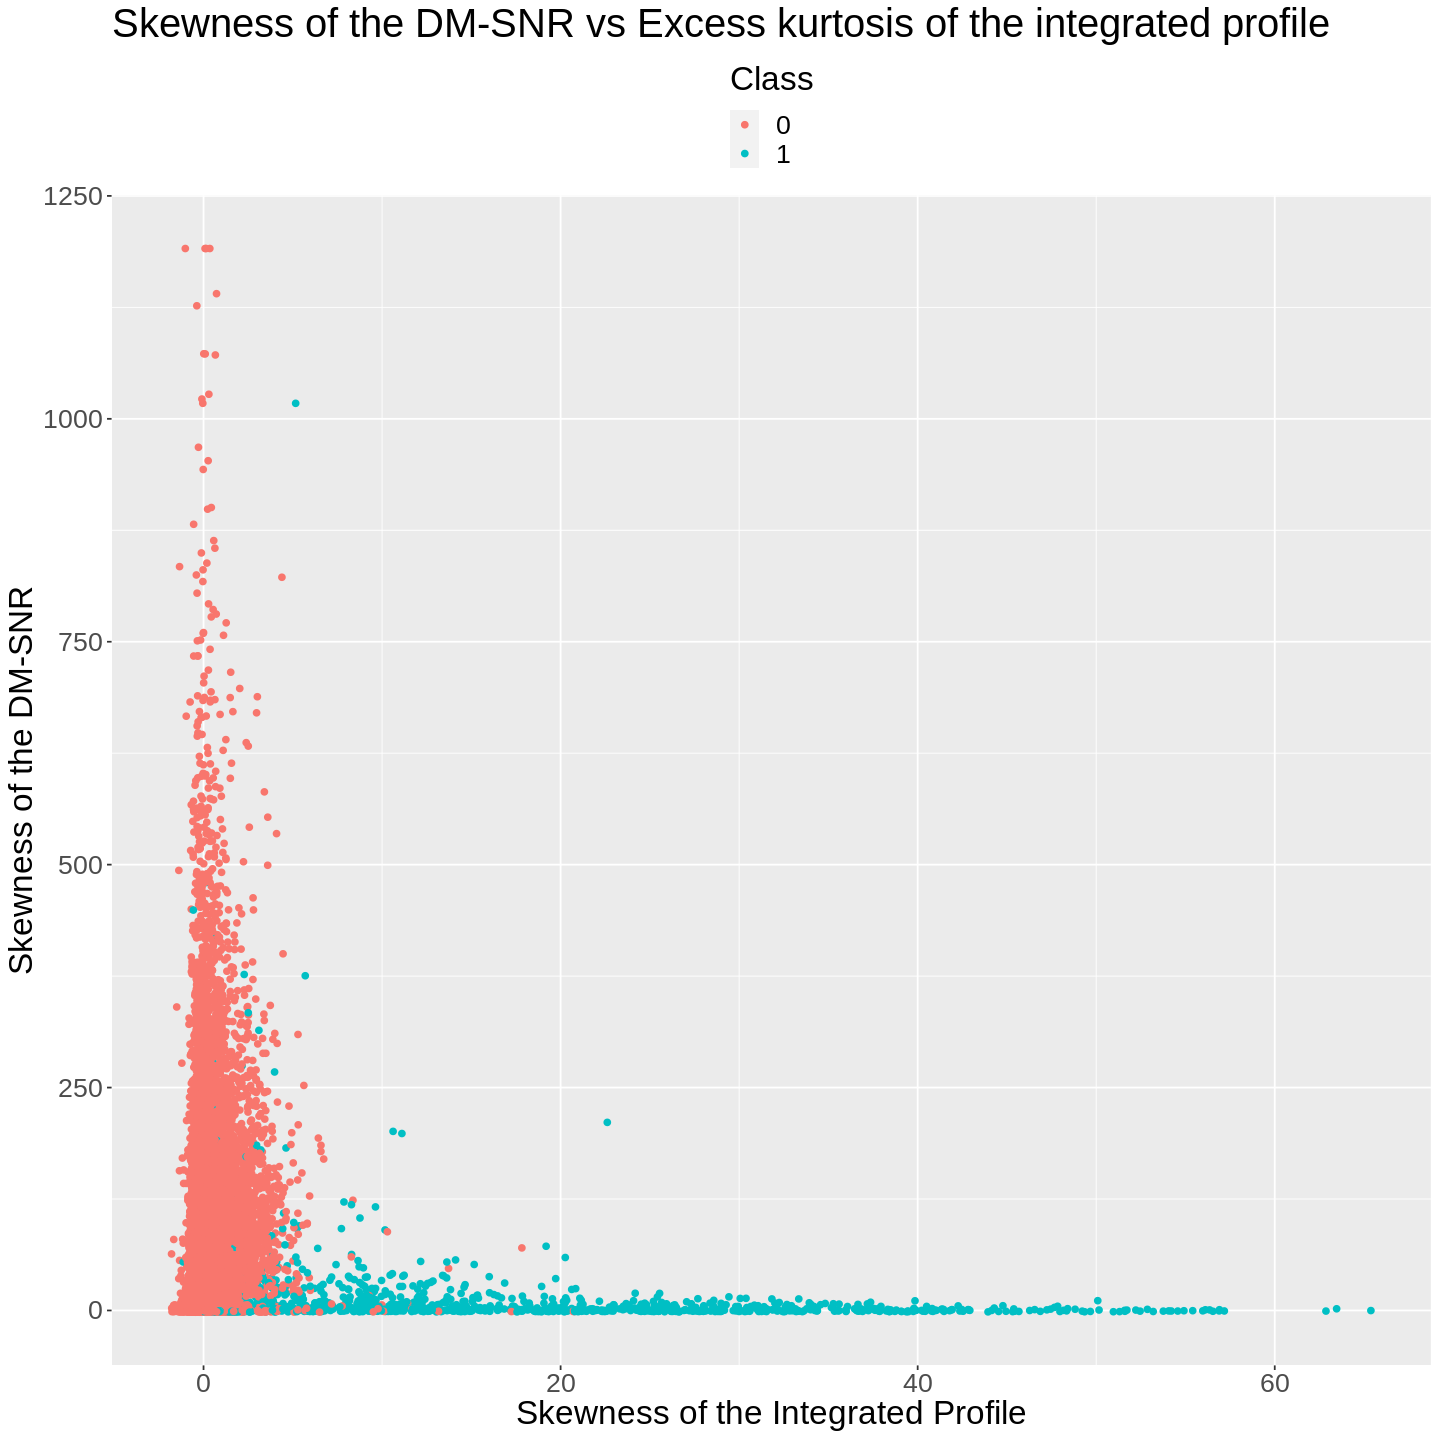

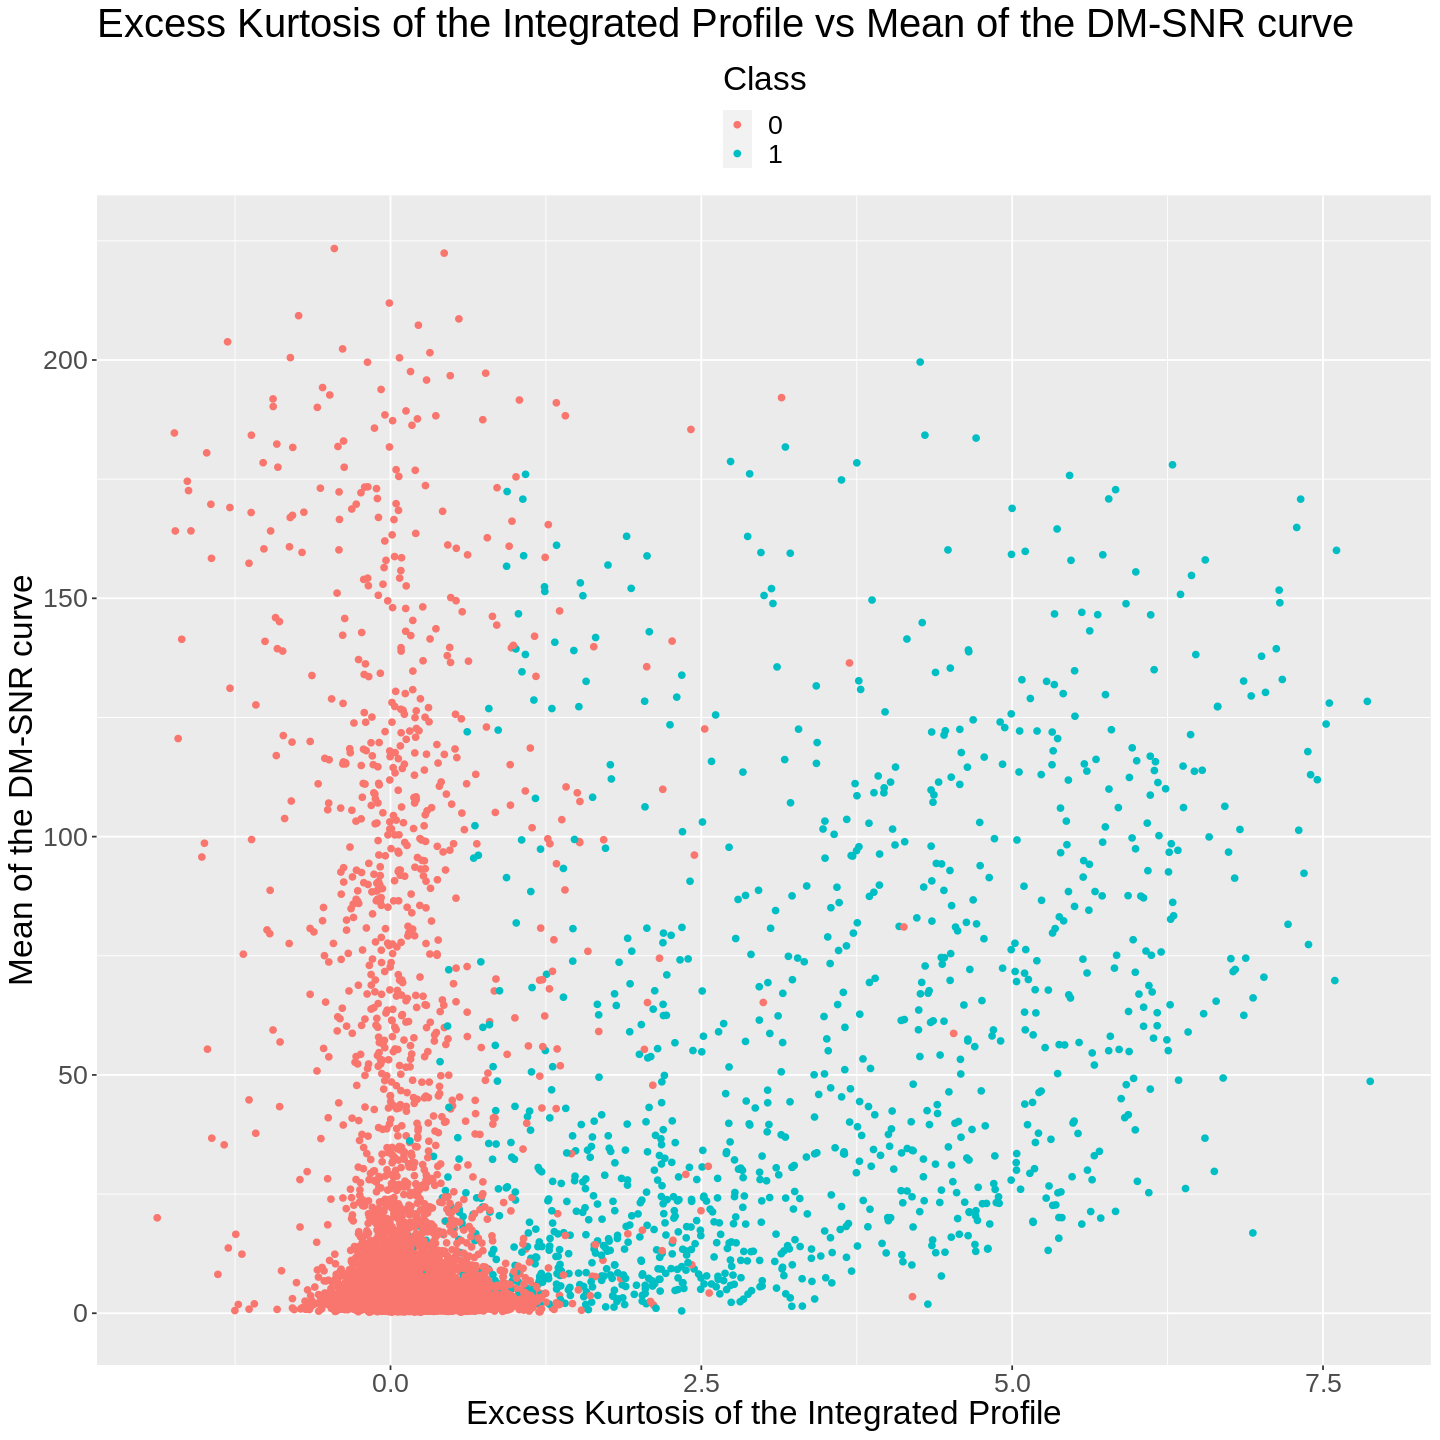

In [15]:
#based on table 1 and the variable pairs plot, we have chosen the following variables for our classification model: 
#IP_exk, IP_skw, DM_mean and DM_skw
#lets make plots of these variables that we can see a bit better
star_plot_2 <- ggplot(star_train, aes(x = IP_skw, y = DM_skw, color = Class)) +
geom_point() +
xlab("Skewness of the Integrated Profile") +
ylab("Skewness of the DM-SNR") +
ggtitle("Skewness of the DM-SNR vs Excess kurtosis of the integrated profile") +
theme(text = element_text(size = 20), legend.position = "top", legend.direction = "vertical")
star_plot_2

star_plot_3 <- ggplot(star_train, aes(x = IP_exk, y = DM_mean, color = Class)) +
geom_point() +
xlab("Excess Kurtosis of the Integrated Profile") +
ylab("Mean of the DM-SNR curve") +
ggtitle("Excess Kurtosis of the Integrated Profile vs Mean of the DM-SNR curve") +
theme(text = element_text(size = 20), legend.position = "top", legend.direction = "vertical")
star_plot_3

# Methods